<a href="https://colab.research.google.com/github/yyyyyokoko/NeuralNets590/blob/master/homework/hw3_ll1038.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ANLY 590 Assignment 3
Luwei Lei

ll1038

### 1. Autoencoder

Build and fit a convolutional autoencoder for the CIFAR10 dataset.
The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will uti- lize UpSampling2D to get the representation back to the original image size.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as tfk

from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LeakyReLU, LSTM, UpSampling2D
from keras.models import Model, Sequential
import tensorflow.keras.layers as tfkl
from keras.layers.convolutional import Conv1D
from keras.layers import SpatialDropout1D, MaxPool1D
from keras.optimizers import Adam

from keras.preprocessing.text import Tokenizer
from string import printable
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import regularizers


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Shape of training data X is ", x_train.shape)
print("Shape of training data y is ", y_train.shape)

print("Shape of testing data X is ", x_test.shape)
print("Shape of testing data y is ", y_test.shape)

Shape of training data X is  (50000, 32, 32, 3)
Shape of training data y is  (50000, 1)
Shape of testing data X is  (10000, 32, 32, 3)
Shape of testing data y is  (10000, 1)


In [ ]:
#input shape
input_img = Input(shape=(32, 32, 3)) 

x = Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, kernel_size =  (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, kernel_size = (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, kernel_size = (3, 3), activation='relu', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

autoencoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 8)         2312      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 8)         

In [ ]:
result_auto = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
391/391 [==============================] - 73s 187ms/step - loss: 0.0343 - accuracy: 0.4125 - val_loss: 0.0209 - val_accuracy: 0.4331
Epoch 2/20
391/391 [==============================] - 59s 150ms/step - loss: 0.0182 - accuracy: 0.5491 - val_loss: 0.0167 - val_accuracy: 0.5905
Epoch 3/20
391/391 [==============================] - 56s 142ms/step - loss: 0.0159 - accuracy: 0.6099 - val_loss: 0.0153 - val_accuracy: 0.6132
Epoch 4/20
391/391 [==============================] - 58s 149ms/step - loss: 0.0149 - accuracy: 0.6276 - val_loss: 0.0145 - val_accuracy: 0.6346
Epoch 5/20
391/391 [==============================] - 53s 135ms/step - loss: 0.0142 - accuracy: 0.6534 - val_loss: 0.0138 - val_accuracy: 0.6742
Epoch 6/20
391/391 [==============================] - 54s 138ms/step - loss: 0.0137 - accuracy: 0.6697 - val_loss: 0.0134 - val_accuracy: 0.6810
Epoch 7/20
391/391 [==============================] - 52s 133ms/step - loss: 0.0133 - accuracy: 0.6785 - val_loss: 0.0131 - val_ac

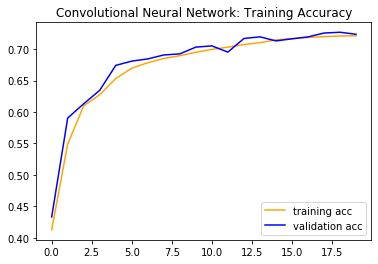

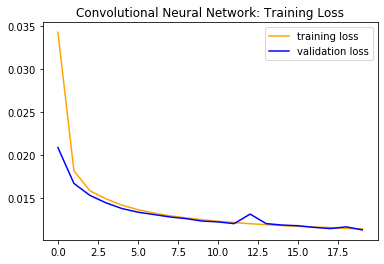

In [ ]:
history = pd.DataFrame.from_dict(result_auto.history)


acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Convolutional Neural Network: Training Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Convolutional Neural Network: Training Loss')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


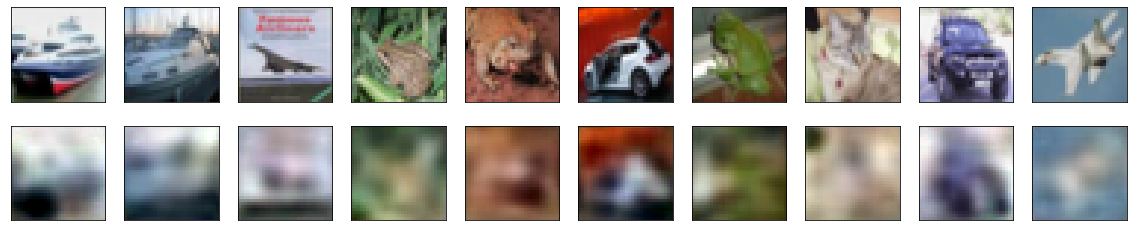

In [ ]:
new = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

# original
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    ax = plt.subplot(2, n, i + n)#predict
    plt.imshow(new[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### 2. Image Classification
#### 2.1 Deep CNN

Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network depth.Train your network end-to-end. Report on your model’s performance on the training set and test set.


Model summary:
This CNN model is consisted of six layers and two dense layers. The first two layers have 3 by 3 kernel size, 64 filters, valid paddings and use relu as activiation function. Then there's a max pooling layer to extract features. In order to avoid overfit, a dropout function is applied with rate of 0.25 to drop some of the cells. The second block has the similar structure except the kernal is 4 by 4 sized. Lastly, there are two dense layers. 

The training accuracy is about 0.71 and testing accuarcy is about 0.6906. 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Shape of training data X is ", x_train.shape)
print("Shape of training data y is ", y_train.shape)

print("Shape of testing data X is ", x_test.shape)
print("Shape of testing data y is ", y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
Shape of training data X is  (50000, 32, 32, 3)
Shape of training data y is  (50000, 1)
Shape of testing data X is  (10000, 32, 32, 3)
Shape of testing data y is  (10000, 1)


In [6]:
model = Sequential()

model.add(tfkl.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(32,32,3))) 
model.add(tfkl.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu')) 
model.add(tfkl.MaxPooling2D(pool_size=(2,2), padding = 'valid'))
model.add(tfkl.Dropout(0.25))

model.add(tfkl.Conv2D(filters=64, kernel_size=(4,4), strides=(1,1),padding='valid', activation='relu'))
model.add(tfkl.MaxPooling2D(pool_size=(2, 2)))
model.add(tfkl.Dropout(0.25))

model.add(tfkl.Flatten())
model.add(tfkl.Dense(64, activation='relu'))
model.add(tfkl.Dropout(0.25))
model.add(tfkl.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)         

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ytrain_label = to_categorical(y_train)
ytest_label = to_categorical(y_test)

results =model.fit(x_train,
                      ytrain_label,
                      steps_per_epoch=100,
                      epochs=20,batch_size=128,
                      validation_data=(x_test,ytest_label))



Epoch 1/20
100/100 [==============================] - 2s 24ms/step - loss: 2.1115 - accuracy: 0.2182 - val_loss: 1.8730 - val_accuracy: 0.3185
Epoch 2/20
100/100 [==============================] - 2s 21ms/step - loss: 1.8225 - accuracy: 0.3382 - val_loss: 1.6858 - val_accuracy: 0.3926
Epoch 3/20
100/100 [==============================] - 2s 21ms/step - loss: 1.6733 - accuracy: 0.3897 - val_loss: 1.6146 - val_accuracy: 0.4264
Epoch 4/20
100/100 [==============================] - 2s 22ms/step - loss: 1.5791 - accuracy: 0.4288 - val_loss: 1.4645 - val_accuracy: 0.4733
Epoch 5/20
100/100 [==============================] - 2s 22ms/step - loss: 1.4844 - accuracy: 0.4672 - val_loss: 1.3152 - val_accuracy: 0.5301
Epoch 6/20
100/100 [==============================] - 2s 22ms/step - loss: 1.4238 - accuracy: 0.4951 - val_loss: 1.2786 - val_accuracy: 0.5494
Epoch 7/20
100/100 [==============================] - 2s 21ms/step - loss: 1.3750 - accuracy: 0.5155 - val_loss: 1.2277 - val_accuracy: 0.5784

In [10]:
#training accuracy 
model.evaluate(x_train, ytrain_label)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.8175 - accuracy: 0.7166


[0.8174813389778137, 0.7165600061416626]

In [9]:
#testing accuracy 
model.evaluate(x_test, ytest_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.9017 - accuracy: 0.6906


[0.9016988277435303, 0.6905999779701233]

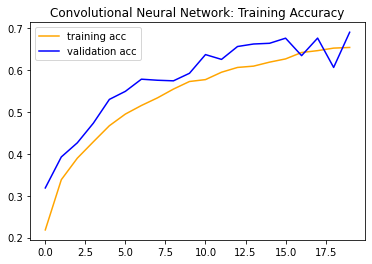

In [11]:
history = pd.DataFrame.from_dict(results.history)

acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Convolutional Neural Network: Training Accuracy')
plt.legend()
plt.show()


#### 2.1 Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on the training set and test set.

The pre-trained VGG model performed a little worse than the previous deep CNN model. The training accuracy is 0.604 and testing accuracy is 0.585. 

In [13]:
from keras.applications import VGG16

baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3), classifier_activation="sigmoid")

for layer in baseModel.layers:
    layer.trainable = False

model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(tfkl.Dense(64, activation='relu'))
model.add(tfkl.Dropout(0.25))
model.add(Dense(10,activation="softmax"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results =model.fit(x_train,
                      ytrain_label,
                      steps_per_epoch=100,
                      epochs=20,batch_size=128,
                      validation_data=(x_test,ytest_label))


Epoch 1/20
100/100 [==============================] - 4s 41ms/step - loss: 1.9056 - accuracy: 0.3215 - val_loss: 1.6327 - val_accuracy: 0.4483
Epoch 2/20
100/100 [==============================] - 4s 37ms/step - loss: 1.6091 - accuracy: 0.4334 - val_loss: 1.4895 - val_accuracy: 0.4836
Epoch 3/20
100/100 [==============================] - 4s 37ms/step - loss: 1.5185 - accuracy: 0.4752 - val_loss: 1.4200 - val_accuracy: 0.5088
Epoch 4/20
100/100 [==============================] - 4s 39ms/step - loss: 1.4469 - accuracy: 0.4951 - val_loss: 1.3674 - val_accuracy: 0.5245
Epoch 5/20
100/100 [==============================] - 4s 36ms/step - loss: 1.4053 - accuracy: 0.5045 - val_loss: 1.3362 - val_accuracy: 0.5357
Epoch 6/20
100/100 [==============================] - 4s 36ms/step - loss: 1.3840 - accuracy: 0.5206 - val_loss: 1.3224 - val_accuracy: 0.5393
Epoch 7/20
100/100 [==============================] - 4s 38ms/step - loss: 1.3496 - accuracy: 0.5288 - val_loss: 1.2928 - val_accuracy: 0.5482

In [15]:
#training accuracy 
model.evaluate(x_train, ytrain_label)

1563/1563 [==============================] - 17s 11ms/step - loss: 1.1379 - accuracy: 0.6041


[1.1378966569900513, 0.6041399836540222]

In [16]:
#testing accuracy 
model.evaluate(x_test, ytest_label)

313/313 [==============================] - 3s 11ms/step - loss: 1.2016 - accuracy: 0.5847


[1.2016011476516724, 0.5846999883651733]

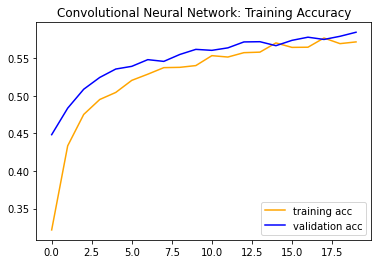

In [17]:
history = pd.DataFrame.from_dict(results.history)

acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Convolutional Neural Network: Training Accuracy')
plt.legend()
plt.show()

### 3. Text Classification
#### 3.1 RNN

Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).


In [18]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
data = '/content/drive/My Drive/ColabNotebooks/SPAM_detection.csv'
df= pd.read_csv(data)

In [31]:
df.head(5)

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [49]:
x = np.asarray(df['Message'])
y = np.asarray(df['category_val'])


In [87]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
vocab_size = len(tokenizer.word_index)+1

sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences,padding='post')

x = sequence.pad_sequences(x, 200)


In [88]:
x_train, x_test, y_train, y_test  = train_test_split(data, y, test_size=0.2, random_state=0)


In [109]:
#rnn model 
model_rnn =Sequential()
model_rnn.add(tfkl.Embedding(vocab_size, 16, input_length=189))
model_rnn.add(tfkl.LSTM(128,return_sequences=True))
model_rnn.add(tfkl.GlobalMaxPool1D())
model_rnn.add(tfkl.Dropout(0.25))
model_rnn.add(tfkl.Dense(64,activation="relu"))
model_rnn.add(tfkl.Dropout(0.25))
model_rnn.add(tfkl.Dense(1,activation="sigmoid"))

model_rnn.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.001),metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 189, 16)           144080    
_________________________________________________________________
lstm_5 (LSTM)                (None, 189, 128)          74240     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [110]:
result_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
70/70 [==============================] - 2s 25ms/step - loss: 0.3992 - accuracy: 0.8600 - val_loss: 0.3059 - val_accuracy: 0.8565
Epoch 2/10
70/70 [==============================] - 1s 18ms/step - loss: 0.1496 - accuracy: 0.9639 - val_loss: 0.1490 - val_accuracy: 0.9659
Epoch 3/10
70/70 [==============================] - 1s 18ms/step - loss: 0.1448 - accuracy: 0.9679 - val_loss: 0.1735 - val_accuracy: 0.9265
Epoch 4/10
70/70 [==============================] - 1s 18ms/step - loss: 0.1113 - accuracy: 0.9679 - val_loss: 0.1213 - val_accuracy: 0.9650
Epoch 5/10
70/70 [==============================] - 1s 18ms/step - loss: 0.0897 - accuracy: 0.9805 - val_loss: 0.1054 - val_accuracy: 0.9767
Epoch 6/10
70/70 [==============================] - 1s 19ms/step - loss: 0.0633 - accuracy: 0.9874 - val_loss: 0.0741 - val_accuracy: 0.9821
Epoch 7/10
70/70 [==============================] - 1s 18ms/step - loss: 0.0757 - accuracy: 0.9780 - val_loss: 0.0574 - val_accuracy: 0.9839
Epoch 8/10
70

In [114]:
#training accuracy 
model_rnn.evaluate(x_train, y_train)


140/140 [==============================] - 1s 6ms/step - loss: 0.0080 - accuracy: 0.9975


[0.008017653599381447, 0.9975319504737854]

In [112]:

#testing accuracy 
model_rnn.evaluate(x_test, y_test)

35/35 [==============================] - 0s 6ms/step - loss: 0.0612 - accuracy: 0.9848


[0.0612105168402195, 0.9847533702850342]

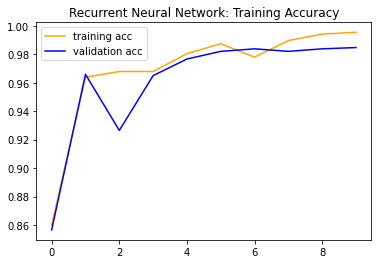

In [115]:
history = pd.DataFrame.from_dict(result_rnn.history)

acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Recurrent Neural Network: Training Accuracy')
plt.legend()
plt.show()

#### 3.2 CNN

Build and train a 1D CNN for this text classification task. We recommend you do a character-level convolution (with character embeddings).



In [116]:
x_train.shape


(4457, 189)

In [117]:
model = Sequential()
model.add(tfkl.Embedding(len(tokenizer.word_index)+1, 16))
model.add(Conv1D(128,activation='relu', kernel_size=3,padding='valid'))
model.add(SpatialDropout1D(0.25))
model.add(MaxPool1D())
model.add(Conv1D(64,activation='relu', kernel_size=3,padding='valid'))
model.add(SpatialDropout1D(0.25))
model.add(MaxPool1D())
model.add(Conv1D(21,activation='relu', kernel_size=2,padding='valid'))
model.add(SpatialDropout1D(0.25))
model.add(MaxPool1D())

model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 16)          144080    
_________________________________________________________________
conv1d_39 (Conv1D)           (None, None, 128)         6272      
_________________________________________________________________
spatial_dropout1d_39 (Spatia (None, None, 128)         0         
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, None, 128)         0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, None, 64)          24640     
_________________________________________________________________
spatial_dropout1d_40 (Spatia (None, None, 64)          0         
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, None, 64)        

In [118]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
70/70 [==============================] - 1s 15ms/step - loss: 0.4554 - accuracy: 0.8631 - val_loss: 0.4030 - val_accuracy: 0.8565
Epoch 2/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3827 - accuracy: 0.8723 - val_loss: 0.3794 - val_accuracy: 0.8712
Epoch 3/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3595 - accuracy: 0.8843 - val_loss: 0.3650 - val_accuracy: 0.8751
Epoch 4/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3528 - accuracy: 0.8869 - val_loss: 0.3638 - val_accuracy: 0.8765
Epoch 5/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3495 - accuracy: 0.8877 - val_loss: 0.3764 - val_accuracy: 0.8756
Epoch 6/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3478 - accuracy: 0.8886 - val_loss: 0.3643 - val_accuracy: 0.8764
Epoch 7/10
70/70 [==============================] - 1s 11ms/step - loss: 0.3474 - accuracy: 0.8889 - val_loss: 0.3646 - val_accuracy: 0.8766
Epoch 8/10
70

In [119]:
#training accuracy 
model.evaluate(x_train, y_train)

140/140 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.8896


[0.33506882190704346, 0.889621913433075]

In [120]:

#testing accuracy 
model.evaluate(x_test, y_test)

35/35 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8763


[0.36684170365333557, 0.8762739896774292]

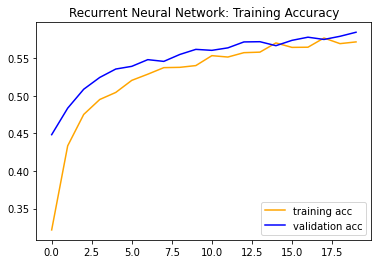

In [121]:
history = pd.DataFrame.from_dict(results.history)

acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Recurrent Neural Network: Training Accuracy')
plt.legend()
plt.show()

#### 3.3

Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

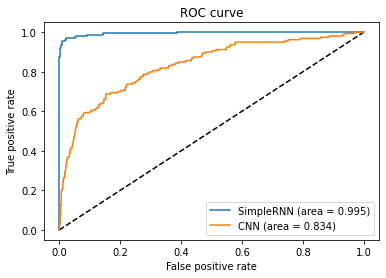

In [124]:
from sklearn.metrics import roc_curve, auc

# ROC on testing data
rnn = model_rnn.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, rnn)
auc_keras = auc(fpr_keras, tpr_keras)

cnn = model_cnn.predict(x_test).ravel()
cnn_fpr_keras, cnn_tpr_keras, cnn_thresholds_keras = roc_curve(y_test, cnn)
cnn_auc_keras = auc(cnn_fpr_keras, cnn_tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='SimpleRNN (area = {:.3f})'.format(auc_keras))
plt.plot(cnn_fpr_keras, cnn_tpr_keras, label='CNN (area = {:.3f})'.format(cnn_auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()